<a href="https://colab.research.google.com/github/JosueAfouda/MLflow/blob/main/initiation_MLflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

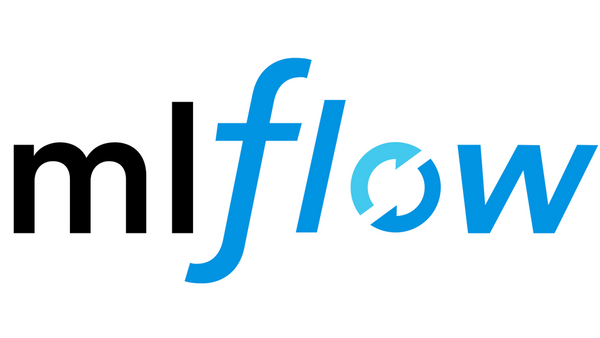

In [1]:
pip install mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 17.9 MB 239 kB/s 
     |████████████████████████████████| 209 kB 42.9 MB/s 
     |████████████████████████████████| 596 kB 32.8 MB/s 
     |████████████████████████████████| 181 kB 61.7 MB/s 
     |████████████████████████████████| 81 kB 9.2 MB/s 
     |████████████████████████████████| 79 kB 7.8 MB/s 
     |████████████████████████████████| 146 kB 48.6 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 78 kB 7.0 MB/s 
  Created wheel for databricks-cli: filename=databricks_cli-0.17.0-py3-none-any.whl size=141960 sha256=98db12c10843eb1de566ad6478971effcf0c8022f1657d710ddfac3e9c3f022f
  Stored in directory: /root/.cache/pip/wheels/55/c3/db/33705569425fd2bdc9ea73051a8053fa26965c2bce8a146747
Successfully built databricks-cli
  Attempting uninstall

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [4]:
dataset = datasets.load_iris()
dataset

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [5]:
seed = 123
X_train, X_test, y_train, y_test = train_test_split(
    dataset.data,
    dataset.target,
    test_size = 0.2,
    random_state = seed
)
X_train.shape

(120, 4)

In [6]:
y_train.shape

(120,)

In [7]:
X_test.shape

(30, 4)

In [8]:
y_test.shape

(30,)

In [9]:
X_test

array([[6.3, 2.5, 4.9, 1.5],
       [6.8, 3. , 5.5, 2.1],
       [6.4, 2.8, 5.6, 2.2],
       [5.6, 3. , 4.1, 1.3],
       [4.9, 3.6, 1.4, 0.1],
       [6. , 3. , 4.8, 1.8],
       [6.3, 2.3, 4.4, 1.3],
       [4.4, 3.2, 1.3, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [5.5, 2.6, 4.4, 1.2],
       [6.9, 3.1, 5.1, 2.3],
       [5.5, 4.2, 1.4, 0.2],
       [5.2, 2.7, 3.9, 1.4],
       [6.5, 3. , 5.5, 1.8],
       [7.7, 3. , 6.1, 2.3],
       [6.5, 3. , 5.8, 2.2],
       [5.5, 3.5, 1.3, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [6.1, 2.9, 4.7, 1.4],
       [4.8, 3. , 1.4, 0.3],
       [5.2, 3.4, 1.4, 0.2],
       [6.3, 2.8, 5.1, 1.5],
       [4.8, 3.4, 1.9, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5.1, 3.8, 1.6, 0.2],
       [5.4, 3.4, 1.7, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.8, 4.9, 2. ],
       [7.7, 3.8, 6.7, 2.2],
       [5. , 3.6, 1.4, 0.2]])

In [11]:
from sklearn.linear_model import LogisticRegression
import mlflow
mlflow.set_experiment("Reg_Logistic_Models")
mlflow.sklearn.autolog()
# premier run
with mlflow.start_run(run_name = 'reg_logistic_defaut'):
  clf = LogisticRegression()
  clf.fit(X_train, y_train)

2022/08/05 16:28:27 INFO mlflow.tracking.fluent: Experiment with name 'Reg_Logistic_Models' does not exist. Creating a new experiment.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [12]:
# Second run
with mlflow.start_run(run_name = 'reg_logistic_max_iter200'):
  clf2 = LogisticRegression(max_iter = 200)
  clf2.fit(X_train, y_train)

In [20]:
mlflow.set_experiment("Decision_Tree_Models")
mlflow.sklearn.autolog()
from sklearn.tree import DecisionTreeClassifier
with mlflow.start_run(run_name = "dt_defaut"):
  dt = DecisionTreeClassifier(random_state = seed)
  dt.fit(X_train, y_train)

2022/08/05 16:42:38 INFO mlflow.tracking.fluent: Experiment with name 'Decision_Tree_Models' does not exist. Creating a new experiment.


In [21]:
with mlflow.start_run(run_name = "dt_max_depth3"):
  dt2 = DecisionTreeClassifier(random_state = seed, max_depth = 3)
  dt2.fit(X_train, y_train)

In [18]:
import numpy as np
new_data = np.array([[5.5, 3.8, 4.6, 1.9]])
new_data

array([[5.5, 3.8, 4.6, 1.9]])

In [24]:
import mlflow
logged_model = 'runs:/342840ec2713489581749897c2f2fc2d/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
prediction = loaded_model.predict(new_data)
prediction

array([1])

In [13]:
pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 5.5 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=ef1baffb9f43db3f9656e05e340445f6f41ce4599d2ff1275ac262ad1c3c7382
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [22]:
from pyngrok import ngrok
# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "27IT7tDgBuITUKPpMMtBOgqr1sY_AxDUUw8cEEVM3ixG299o"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://f527-35-193-64-170.ngrok.io


In [23]:
!mlflow ui

[2022-08-05 16:43:37 +0000] [552] [INFO] Starting gunicorn 20.1.0
[2022-08-05 16:43:37 +0000] [552] [INFO] Listening at: http://127.0.0.1:5000 (552)
[2022-08-05 16:43:37 +0000] [552] [INFO] Using worker: sync
[2022-08-05 16:43:37 +0000] [555] [INFO] Booting worker with pid: 555
[2022-08-05 16:46:08 +0000] [552] [INFO] Handling signal: int

Aborted!
[2022-08-05 16:46:08 +0000] [555] [INFO] Worker exiting (pid: 555)
[2022-08-05 16:46:08 +0000] [552] [INFO] Shutting down: Master
